In [26]:
%pwd

'/Users/harrybarber/Desktop/DSC478/Assignment3/PROGRAMMING MACHINE LEARNING A - 2021-2022 Winter - 2142022 - 510 PM'

In [17]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

warnings.simplefilter('ignore', FutureWarning)

In [18]:
# fetch multiple asset data
def getMultiAssetData(tickerList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

In [19]:
date_from = datetime.date(2017, 1, 1)
date_to = datetime.date(2022, 2, 18)
tickerList = ['NVDA', 'QCOM', 'BTC-USD','SPY']
multiData = getMultiAssetData(tickerList, date_from, date_to)
multiData.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [20]:
multiData.head

<bound method NDFrame.head of                          High         Low        Open       Close  \
Ticker Date                                                         
NVDA   2017-01-03   26.592501   24.844999   26.100000   25.502501   
       2017-01-04   26.375000   25.382500   25.850000   26.097500   
       2017-01-05   26.455000   25.262501   26.132500   25.434999   
       2017-01-06   26.062500   25.299999   25.712500   25.775000   
       2017-01-09   27.000000   25.875000   25.875000   26.820000   
...                       ...         ...         ...         ...   
SPY    2022-02-14  441.600006  435.339996  439.920013  439.019989   
       2022-02-15  446.279999  443.179993  443.730011  446.100006   
       2022-02-16  448.059998  441.940002  443.929993  446.600006   
       2022-02-17  446.570007  436.420013  443.220001  437.059998   
       2022-02-18  438.660004  431.820007  437.329987  434.230011   

                        Volume   Adj Close  
Ticker Date                

In [22]:
multiData.shape

(5755, 6)

In [3]:
date_from = datetime.date(2017, 1, 1)
date_to = datetime.date(2022, 2, 18)
tickerList = ['NVDA', 'QCOM', 'BTC-USD','SPY']
multiData = getMultiAssetData(tickerList, date_from, date_to)

# use pivot to reshape DataFrame with only Close
ClosePrice = multiData[['Close']]
ClosePrice = ClosePrice.reset_index()
ClosePriceTable = ClosePrice.pivot(index='Date', columns='Ticker', values='Close')

In [4]:
DawJones = pdr.DataReader('^DJI', "stooq", date_from, date_to).sort_index()
BondUS = pdr.DataReader('BND.US', "stooq", date_from, date_to).sort_index()
df = pd.concat([ClosePriceTable, DawJones['2017-1-1':'2022-02-18']['Close'], BondUS['2017-1-1':'2022-02-18']['Close']], axis=1)
df.columns = ['NVDA', 'Qualcomm', 'Bitcoin', 'SPY', 'DowJones', 'US Bond']

In [7]:
df.tail()

,NVDA,Qualcomm,Bitcoin,SPY,DowJones,US Bond
Date,,,,,,
2022-02-15,44575.203125,264.950012,173.000000,446.100006,34988.84,81.10
2022-02-16,43961.859375,265.109985,172.600006,446.600006,34934.27,81.21
2022-02-17,40538.011719,245.070007,166.800003,437.059998,34312.03,81.39
2022-02-18,40030.976562,236.419998,167.639999,434.230011,34079.18,81.53
2022-02-19,40122.156250,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,NVDA,Qualcomm,Bitcoin,SPY,DowJones,US Bond
count,1876.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,16191.743585,91.146058,89.937270,315.297989,27053.605932,80.107779
std,17278.423464,70.200210,38.587374,69.016853,4487.746427,5.192534
min,777.757019,23.872499,49.400002,222.949997,18591.930000,72.725000
25%,5744.692871,42.544998,57.619999,266.019989,24242.490000,74.821000
50%,8803.468750,60.680000,74.620003,290.089996,26067.280000,80.329000
75%,16979.701172,130.252502,127.529999,353.209991,29379.770000,85.230000
max,67566.828125,333.760010,189.279999,477.709991,36799.650000,88.496000


In [9]:
# calculate daily percent change and 21 days rolling percent change
rolling_pct_change = df.pct_change().rolling(21).sum().fillna(0)
rolling_pct_change.tail()

,NVDA,Qualcomm,Bitcoin,SPY,DowJones,US Bond
Date,,,,,,
2022-02-15,0.197827,0.186840,0.055447,0.027896,0.020709,-0.024823
2022-02-16,0.186824,0.167376,0.043766,0.031525,0.022929,-0.017934
2022-02-17,0.101178,0.128145,0.044893,0.015102,0.005331,-0.018983
2022-02-18,0.071273,0.052018,0.015127,-0.016208,-0.017985,-0.018468
2022-02-19,0.064186,0.052018,0.015127,-0.016208,-0.017985,-0.018468


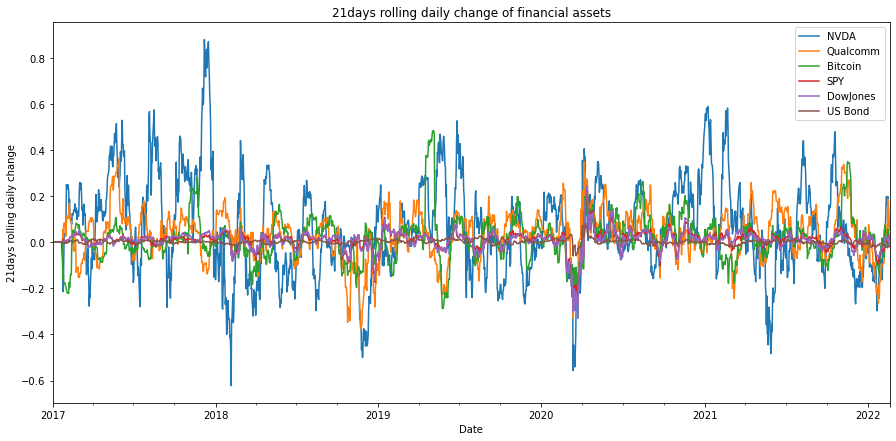

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
rolling_pct_change.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('21days rolling daily change')
ax1.set_title('21days rolling daily change of financial assets')
plt.show()

In [11]:
# calculate daily percent change and 21 days rolling standard deviation
rolling_std = df.pct_change().rolling(21).std().fillna(0)
rolling_std.tail()

,NVDA,Qualcomm,Bitcoin,SPY,DowJones,US Bond
Date,,,,,,
2022-02-15,0.031453,0.038705,0.032819,0.012091,0.008654,0.003540
2022-02-16,0.031756,0.038657,0.032799,0.012060,0.008606,0.003434
2022-02-17,0.036979,0.041732,0.032736,0.012994,0.009545,0.003378
2022-02-18,0.037046,0.041871,0.031884,0.011833,0.008891,0.003396
2022-02-19,0.037022,0.041871,0.031884,0.011833,0.008891,0.003396


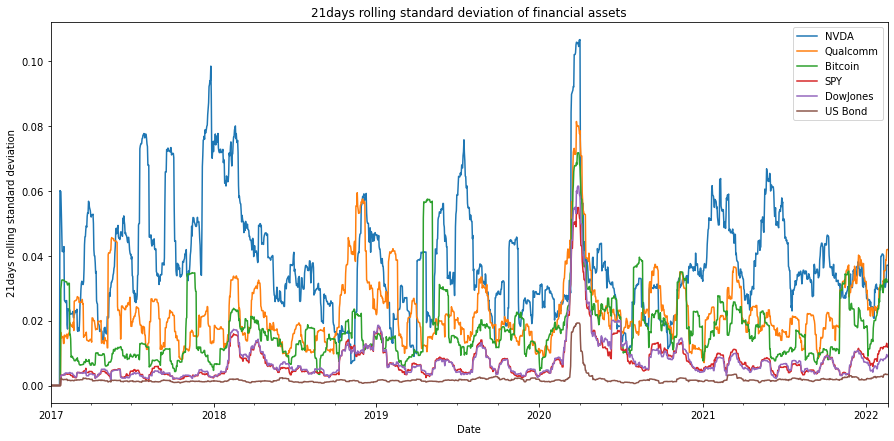

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax2 = fig.add_subplot(1, 1, 1)
rolling_std.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('21days rolling standard deviation')
ax2.set_title('21days rolling standard deviation of financial assets')
plt.show()

In [15]:
# calculate daily percent change and 21 days correlations with DowJones
df_ = df.pct_change().rolling(21)
correlation_change = rolling_pct_change.copy()
correlation_change['NVDA'] = df_['SPY'].corr(df['NVDA'].pct_change().fillna(0))
correlation_change['Qualcomm'] = df_['SPY'].corr(df['Qualcomm'].pct_change().fillna(0))
correlation_change['Bitcoin'] = df_['SPY'].corr(df['Bitcoin'].pct_change().fillna(0))
correlation_change['DowJones'] = df_['SPY'].corr(df['DowJones'].pct_change().fillna(0))
correlation_change['US Bond'] = df_['SPY'].corr(df['US Bond'].pct_change().fillna(0))
correlation_change.drop('SPY', axis=1, inplace=True) # SPY was the key
correlation_change.tail()

,NVDA,Qualcomm,Bitcoin,DowJones,US Bond
Date,,,,,
2022-02-15,0.263254,0.877790,0.905319,0.970028,0.139441
2022-02-16,0.256202,0.886329,0.911922,0.969228,0.121884
2022-02-17,0.402901,0.908958,0.916077,0.976297,0.064303
2022-02-18,0.416162,0.928919,0.919795,0.971984,-0.015580
2022-02-19,0.415817,0.928919,0.919795,0.971984,-0.015580


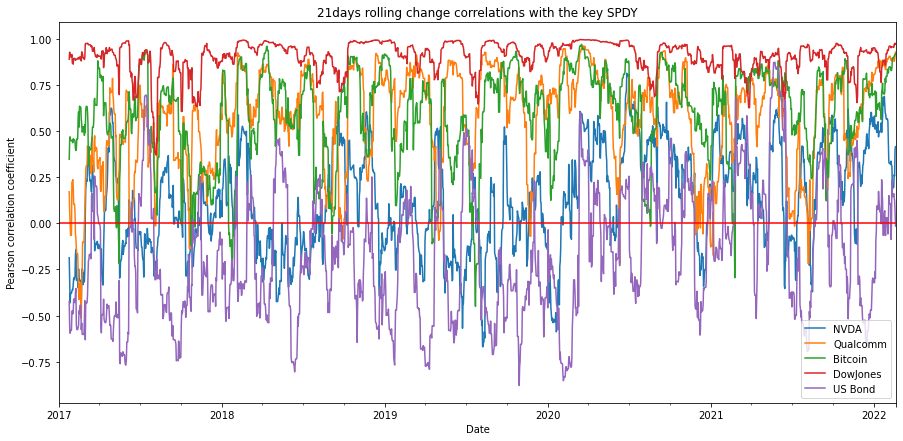

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
correlation_change.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Pearson correlation coefficient')
ax3.set_title('21days rolling change correlations with the key SPY')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

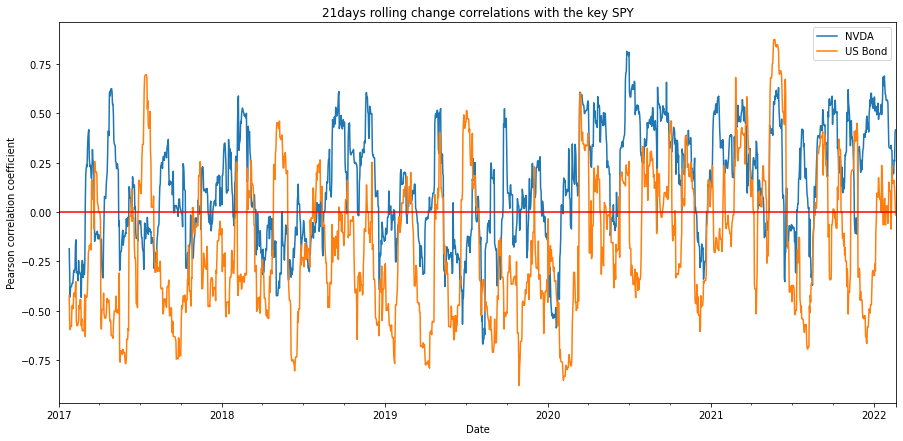

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)

correlation_change[['NVDA','US Bond']].plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Pearson correlation coefficient')
ax3.set_title('21days rolling change correlations with the key SPY')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()